# Deep Learning

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import hvplot.pandas
from collections import Counter
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

In C:\Users\markf\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\markf\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\markf\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
# Load the cleaned hotel booking data into the workbook and convert to pandas Dataframe
csv_path = Path('../Resources/cleaned_hotel_bookings.csv')

df = pd.read_csv(csv_path)
df.head()

,Unnamed: 0,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,meal,market_segment,reserved_room_type,customer_type,adr,total_of_special_requests,date
0,2,Resort Hotel,7,27,0,1,1,BB,Direct,A,Transient,80.0,0,2015-07-01
1,4,Resort Hotel,14,27,0,2,2,BB,Online TA,A,Transient,100.0,1,2015-07-01
2,5,Resort Hotel,14,27,0,2,2,BB,Online TA,A,Transient,100.0,1,2015-07-01
3,6,Resort Hotel,0,27,0,2,2,BB,Direct,C,Transient,110.0,0,2015-07-01
4,7,Resort Hotel,9,27,0,2,2,FB,Direct,C,Transient,100.0,1,2015-07-01


In [3]:
# Drop unamed row
df = df.drop(columns = ['Unnamed: 0'])


In [4]:
# Define features data
X = df.copy()
X = X.drop(columns=["adr"])
X.head()

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,meal,market_segment,reserved_room_type,customer_type,total_of_special_requests,date
0,Resort Hotel,7,27,0,1,1,BB,Direct,A,Transient,0,2015-07-01
1,Resort Hotel,14,27,0,2,2,BB,Online TA,A,Transient,1,2015-07-01
2,Resort Hotel,14,27,0,2,2,BB,Online TA,A,Transient,1,2015-07-01
3,Resort Hotel,0,27,0,2,2,BB,Direct,C,Transient,0,2015-07-01
4,Resort Hotel,9,27,0,2,2,FB,Direct,C,Transient,1,2015-07-01


In [5]:
# Define target data
y = df["adr"].values
y = y.reshape(-1, 1)
y[:5]

array([[ 80.],
       [100.],
       [100.],
       [110.],
       [100.]])

In [6]:
# import preprocessing from sklearn
from sklearn import preprocessing

In [7]:
# view columns using df.columns
X.columns

Index(['hotel', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'meal',
       'market_segment', 'reserved_room_type', 'customer_type',
       'total_of_special_requests', 'date'],
      dtype='object')

In [8]:
# Drop date because we have week of the booking for the year
X = X.drop(columns = ['date'])

In [9]:
# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
X_2 = X.apply(le.fit_transform)
X_2.head()

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,meal,market_segment,reserved_room_type,customer_type,total_of_special_requests
0,1,7,26,0,1,1,0,0,0,2,0
1,1,14,26,0,2,2,0,3,0,2,1
2,1,14,26,0,2,2,0,3,0,2,1
3,1,0,26,0,2,2,0,0,2,2,0
4,1,9,26,0,2,2,1,0,2,2,1


In [10]:
X_2.dtypes

hotel                        int32
lead_time                    int64
arrival_date_week_number     int64
stays_in_weekend_nights      int64
stays_in_week_nights         int64
adults                       int64
meal                         int32
market_segment               int32
reserved_room_type           int32
customer_type                int32
total_of_special_requests    int64
dtype: object

In [11]:
X_2 = np.asarray(X_2).astype(np.float32)

In [12]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_2, y, random_state=2)

In [13]:
 # Create the scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the features data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 11

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [15]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X_train_scaled, y_train, validation_split=0.3, epochs=100)

Epoch 1/100
1683/1683 [==============================] - 4s 2ms/step - loss: 9718.2275 - mse: 9718.2275 - val_loss: 4378.3999 - val_mse: 4378.3999
Epoch 2/100
1683/1683 [==============================] - 3s 2ms/step - loss: 2714.4358 - mse: 2714.4358 - val_loss: 2016.4420 - val_mse: 2016.4420
Epoch 3/100
1683/1683 [==============================] - 4s 2ms/step - loss: 1866.1963 - mse: 1866.1963 - val_loss: 1711.9819 - val_mse: 1711.9819
Epoch 4/100
1683/1683 [==============================] - 4s 2ms/step - loss: 1631.0486 - mse: 1631.0486 - val_loss: 1534.6095 - val_mse: 1534.6095
Epoch 5/100
1683/1683 [==============================] - 4s 2ms/step - loss: 1493.5989 - mse: 1493.5989 - val_loss: 1426.4447 - val_mse: 1426.4447
Epoch 6/100
1683/1683 [==============================] - 3s 2ms/step - loss: 1386.6381 - mse: 1386.6381 - val_loss: 1324.3301 - val_mse: 1324.3301
Epoch 7/100
1683/1683 [==============================] - 4s 2ms/step - loss: 1295.7500 - mse: 1295.7500 - val_loss: 12

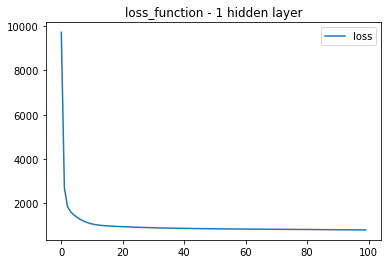

In [16]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

In [17]:
# Define the model - deep neural net
number_input_features = 11
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [18]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X_train_scaled, y_train, validation_split=0.3, epochs=100)

Epoch 1/100
1683/1683 [==============================] - 3s 2ms/step - loss: 8243.1924 - mse: 8243.1924 - val_loss: 1927.4775 - val_mse: 1927.4775
Epoch 2/100
1683/1683 [==============================] - 3s 2ms/step - loss: 1685.5089 - mse: 1685.5089 - val_loss: 1539.3457 - val_mse: 1539.3457
Epoch 3/100
1683/1683 [==============================] - 3s 2ms/step - loss: 1480.0378 - mse: 1480.0378 - val_loss: 1421.6382 - val_mse: 1421.6382
Epoch 4/100
1683/1683 [==============================] - 3s 2ms/step - loss: 1389.6407 - mse: 1389.6407 - val_loss: 1354.3666 - val_mse: 1354.3666
Epoch 5/100
1683/1683 [==============================] - 3s 2ms/step - loss: 1340.0140 - mse: 1340.0140 - val_loss: 1320.6560 - val_mse: 1320.6560
Epoch 6/100
1683/1683 [==============================] - 3s 2ms/step - loss: 1311.2574 - mse: 1311.2574 - val_loss: 1294.5780 - val_mse: 1294.5780
Epoch 7/100
1683/1683 [==============================] - 3s 2ms/step - loss: 1291.2859 - mse: 1291.2859 - val_loss: 12

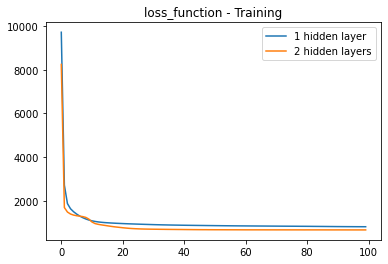

In [19]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

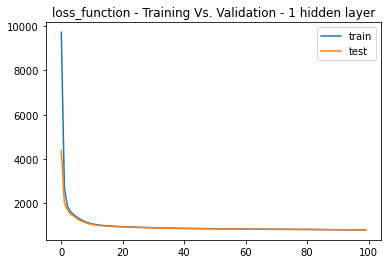

In [20]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

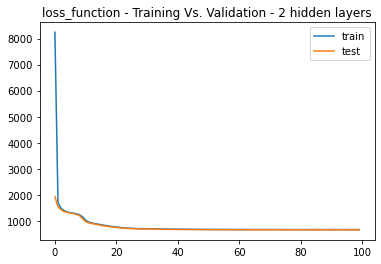

In [21]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()

In [22]:
 # Save model as JSON
nn_json = nn.to_json()
file_path = Path("../Resources/model_2.json")
with open(file_path, "w") as json_file:
    json_file.write(nn_json)

# Save weights
file_path = "../Resources/model_2.h5"
nn.save_weights(file_path)

In [23]:
# Load the model to predict values
from tensorflow.keras.models import model_from_json

# Load json and create model
file_path = Path("../Resources/model_2.json")
with open(file_path, "r") as json_file:
    model_json = json_file.read()
loaded_model = model_from_json(model_json)

# Load weights into new model
file_path = "../Resources/model_2.h5"
loaded_model.load_weights(file_path)

In [24]:
# Predict values using the testing data
from sklearn.metrics import mean_squared_error

y_pred = loaded_model.predict(X_test_scaled)

In [25]:
 # Evaluate the model with the MSE metric
print(mean_squared_error(y_test, y_pred))

654.8524580661119


In [26]:
 # Save model as JSON
nn_json = nn.to_json()
file_path = Path("../Resources/model_1.json")
with open(file_path, "w") as json_file:
    json_file.write(nn_json)

# Save weights
file_path = "../Resources/model_1.h5"
nn.save_weights(file_path)

# Load the model to predict values
from tensorflow.keras.models import model_from_json

# Load json and create model
file_path = Path("../Resources/model_1.json")
with open(file_path, "r") as json_file:
    model_json = json_file.read()
loaded_model = model_from_json(model_json)

# Load weights into new model
file_path = "../Resources/model_1.h5"
loaded_model.load_weights(file_path)

# Predict values using the testing data
from sklearn.metrics import mean_squared_error

y_pred = loaded_model.predict(X_test_scaled)

In [27]:
 # Evaluate the model with the MSE metric
print(mean_squared_error(y_test, y_pred))

654.8524580661119


In [35]:
# Make some predictions with the loaded model
Results = pd.DataFrame(y_test)
Results.columns=['adr']
Results["Predicted Value"] = y_pred
Results['Diff'] = Results['Predicted Value'] - Results.adr
Results

,adr,Predicted Value,Diff
0,90.0,101.183960,11.183960
1,110.0,98.602379,-11.397621
2,60.0,87.067970,27.067970
3,100.0,160.833572,60.833572
4,110.0,128.439468,18.439468
5,70.0,67.752007,-2.247993
6,100.0,118.962090,18.962090
7,80.0,85.264183,5.264183
8,140.0,124.837273,-15.162727
9,170.0,116.011444,-53.988556


In [36]:
Results.Diff.hvplot(kind = 'scatter')

:Scatter   [index]   (Diff)